In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.data', names=['setl','setw','petl','petw','class'])

In [3]:
data.head()

,setl,setw,petl,petw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
np.unique(data['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
Y = np.array(data['class'])

Y[Y=='Iris-setosa'] = 0
Y[Y=='Iris-versicolor'] = 1
Y[Y=='Iris-virginica'] = 1

Y = np.array(Y, dtype=int)

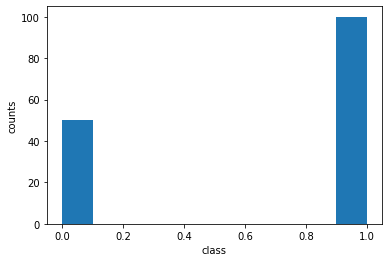

In [6]:
plt.hist(Y)
plt.xlabel('class')
plt.ylabel('counts')
plt.show()

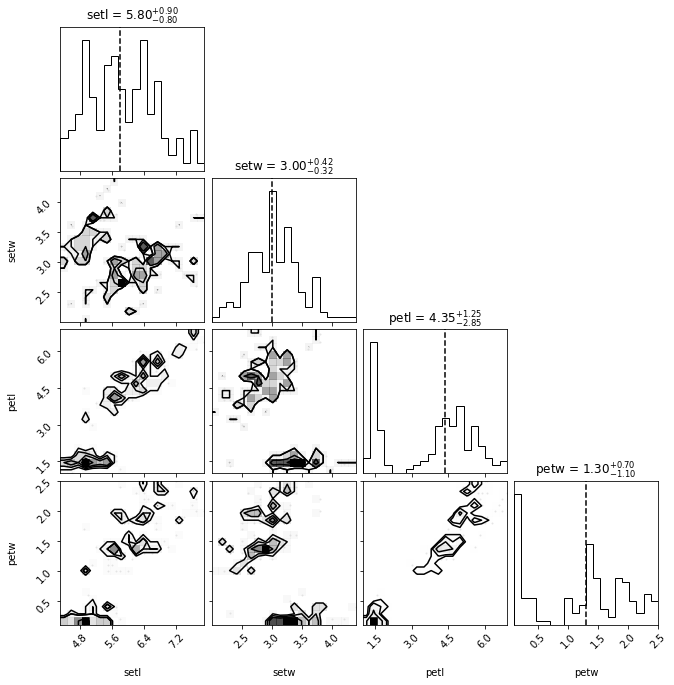

In [7]:
import corner

keys = ['setl','setw','petl','petw']

figure = corner.corner(data[keys],labels=keys, show_titles=True, quantiles=[0.5])

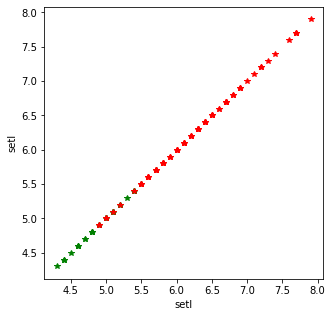

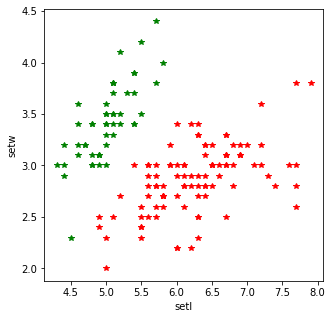

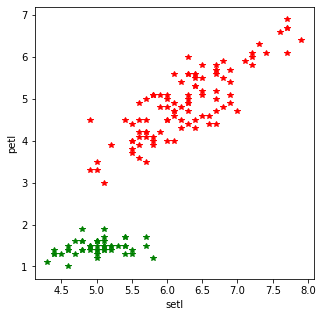

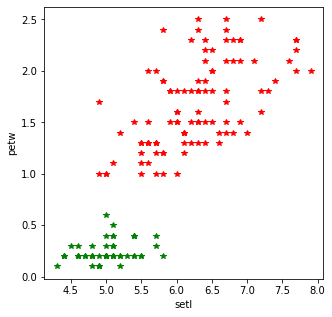

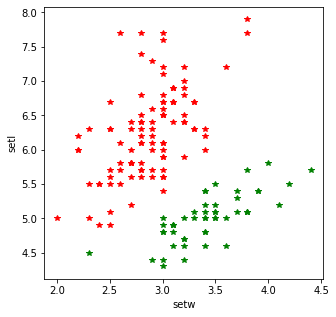

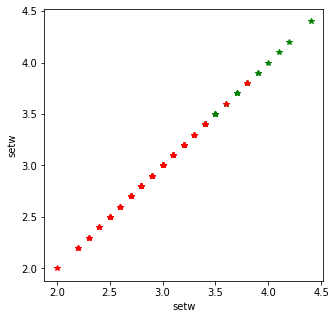

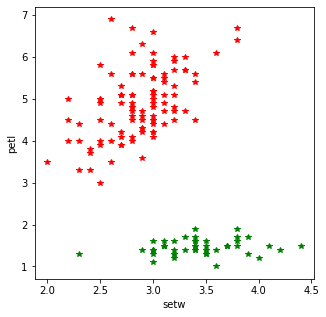

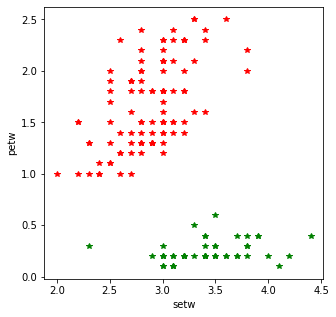

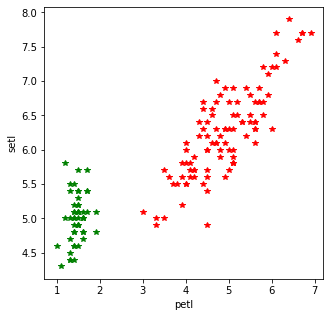

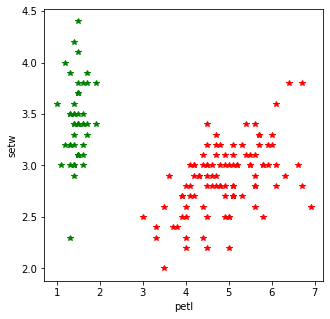

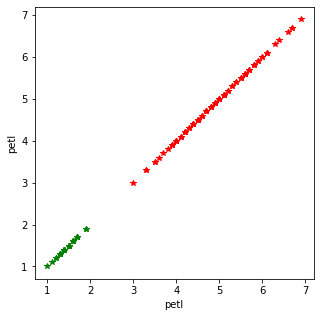

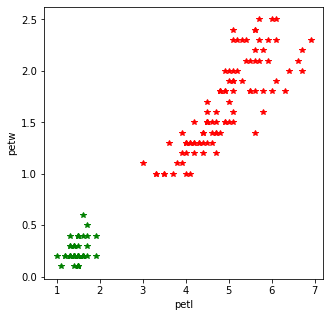

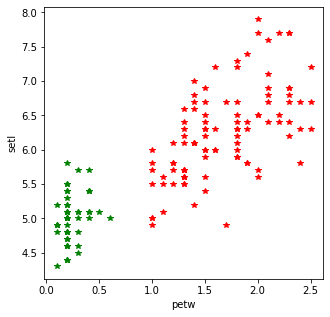

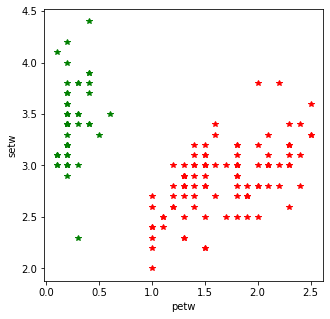

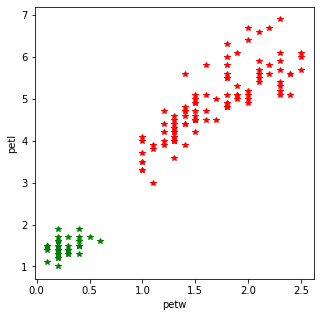

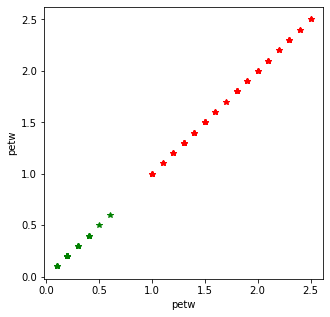

In [8]:
c0 = Y==0
c1 = Y==1

for kx in keys:
    for ky in keys:
        fig = plt.figure(figsize=(5,5))
        plt.plot(data[kx][c0],data[ky][c0],'*',c='green')
        plt.plot(data[kx][c1],data[ky][c1],'*',color='red')
        plt.xlabel(kx)
        plt.ylabel(ky)
        plt.show()

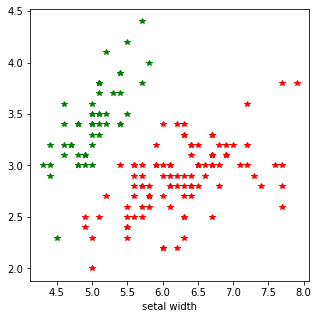

In [9]:
fig = plt.figure(figsize=(5,5))
plt.plot(data['setl'][c0],data['setw'][c0],'*',c='green')
plt.plot(data['setl'][c1],data['setw'][c1],'*',color='red')
plt.xlabel('setal lenght')
plt.xlabel('setal width')
plt.show()

In [10]:
x1 = data['setl']
x2 = data['setw']

#-- Definimos nuestra función de activación, en este caso usamos un Sigmoide
def act(z):
  return 1/(1 + np.exp(-z))

### Usando un perceptron

Epoch [1/200], bias: 0.0, w1: 0.9500000000000002, w2: -0.1499999999999999
Epoch [2/200], bias: 0.0, w1: 1.9000000000000004, w2: -0.2999999999999998
Epoch [3/200], bias: 0.0, w1: 2.8500000000000005, w2: -0.44999999999999973
Epoch [4/200], bias: 0.0, w1: 3.8000000000000007, w2: -0.5999999999999996
Epoch [5/200], bias: 0.0, w1: 4.450000000000001, w2: -0.7499999999999996
Epoch [6/200], bias: -0.5, w1: 2.950000000000001, w2: -2.3999999999999995
Epoch [7/200], bias: -0.5, w1: 3.9000000000000012, w2: -2.5499999999999994
Epoch [8/200], bias: -0.5, w1: 4.850000000000001, w2: -2.699999999999999
Epoch [9/200], bias: -0.5, w1: 5.500000000000002, w2: -2.849999999999999
Epoch [10/200], bias: -1.0, w1: 4.200000000000002, w2: -4.15
Epoch [11/200], bias: -1.0, w1: 5.150000000000002, w2: -4.300000000000001
Epoch [12/200], bias: -1.0, w1: 6.100000000000002, w2: -4.450000000000001
Epoch [13/200], bias: -1.5, w1: 4.8000000000000025, w2: -5.750000000000002
Epoch [14/200], bias: -1.5, w1: 5.750000000000003, 

Epoch [199/200], bias: -19.5, w1: 28.300000000000093, w2: -39.599999999999774
Epoch [200/200], bias: -20.0, w1: 26.800000000000093, w2: -40.64999999999977


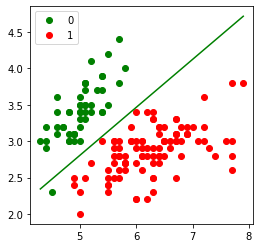

In [11]:
#-- Definimos el Perceptron

# Inicializamos los pesos en 0
b = 0
w_1 = 0
w_2 = 0

# Inicializamos el número de épocas y la rata de aprendizaje
n_epochs = 200 # Número de épocas
n = 0.5      # Tasa de aprendizaje

# Esta es la función nuestro perceptron encontrará al final de todas las épocas
def y(x):
 return -(b + w_1*x)/w_2

# Entrenamos el Perceptron
for epoch in range(n_epochs):
  for i,j,k in zip(x1,x2,Y):
    
    # Función de Suma
    z = i*w_1 + j*w_2 + b

    # Función de Activación
    sig_z = act(z)

    # Evaluamos la salida (output)
    if sig_z >= 0.5:
      out = 1
    if sig_z < 0.5:
      out = 0
    
    # Calculamos el error
    error = k - out

    # Actualizamos los pesos
    b = b + n*error
    w_1 += n*error*i
    w_2 += n*error*j

  print('Epoch [{}/{}], bias: {}, w1: {}, w2: {}'.format(epoch+1,n_epochs,b,w_1,w_2))

fig = plt.figure(figsize=(4,4))
plt.plot(x1[c0],x2[c0],'o', c='green', label='0')
plt.plot(x1[c1],x2[c1],'o', c='red', label='1')
plt.plot(np.sort(x1),y(np.sort(x1)),'-', c='green',)
plt.legend()
plt.show()

### Usando MLP

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('iris.data', names=['setl','setw','petl','petw','class'])
keys = ['setl','setw','petl','petw']

X = data[keys]
Y = np.array(data['class'])

Y[Y=='Iris-setosa'] = 0
Y[Y=='Iris-versicolor'] = 1
Y[Y=='Iris-virginica'] = 2

Y = np.array(Y, dtype=int)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

### Dos Capas

In [45]:
model = MLPClassifier(hidden_layer_sizes=(3, 3), random_state=1)
model.fit(X_train,Y_train)

/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(hidden_layer_sizes=(3, 3), random_state=1)

In [46]:
Y_pred = model.predict(X_test)

In [47]:
accuracy_score(Y_pred,Y_test)

0.8947368421052632

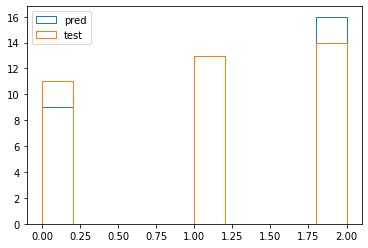

In [48]:
plt.hist(Y_pred, histtype='step', label='pred')
plt.hist(Y_test, histtype='step', label='test')
plt.legend(loc=2)
plt.show()

### Tres Capas

In [64]:
model = MLPClassifier(hidden_layer_sizes=(3, 3, 3), random_state=1)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
accuracy_score(Y_pred,Y_test)

0.631578947368421

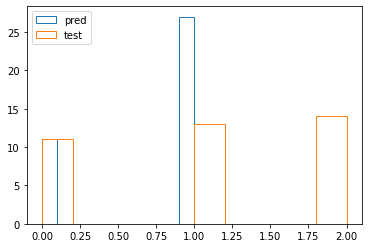

In [66]:
plt.hist(Y_pred, histtype='step', label='pred')
plt.hist(Y_test, histtype='step', label='test')
plt.legend(loc=2)
plt.show()